# Univariate EDA

* distributions
* pie charts
* bar charts
* central tendencies 

# EDA Bivariate

* scatter plots
* line plots
* correlation heat map

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 

import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv("data/transformed/all_data.csv")

# limit to data to only this year

df = df[df["date_time"] > '2023-01-01']

In [3]:
df.head()

,title,company_name,location,date_time,work_from_home,tech_tokens,deg_tokens,level,etype
194,data analyst,robert half,"oklahoma city, ok",2023-05-21 07:00:30.990626,False,['go'],[],not applicable,contractor
195,marketing data analyst,ledger bennett,anywhere,2023-05-21 07:00:30.990626,True,"['excel', 'tableau', 'sql']",[],mid-senior level,full-time
196,"boolean search data analyst | $54,000-$108,000...",it pros,anywhere,2023-05-21 07:00:30.990626,True,[],[],not applicable,part-time
197,product data analyst - ditch witch - now hiring,the toro company,"perry, ok",2023-05-21 07:00:30.990626,False,"['assembly', 'excel', 'sap']",[],mid-senior level,full-time
198,data analyst,webtpa,united states,2023-05-21 07:00:30.990626,False,"['vba', 'ssrs', 'crystal', 'power_bi', 'ssis',...",[],not applicable,full-time


In [4]:
df.shape

(10005, 9)

In [5]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [6]:
date_jobs = df["date_time"].dt.to_period('M').value_counts().sort_index()
date_jobs

2023-01    1951
2023-02    1438
2023-03    1438
2023-04    1298
2023-05    1242
2023-06    1311
2023-07    1327
Freq: M, Name: date_time, dtype: int64

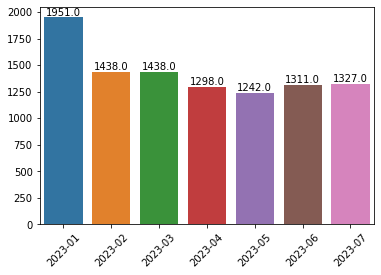

In [7]:
# histograms

# view distribution by year and month
ax = sns.barplot(x = date_jobs.index , y = date_jobs.values)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/months_bar.png")

In [8]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_df = df.copy()

day_df.index = df["date_time"]

occ = day_df.resample('1D').count()["title"]

occ = occ.groupby(occ.index.dayofweek).mean().set_axis(order)

occ

Monday       38.033333
Tuesday      42.666667
Wednesday    49.500000
Thursday     55.133333
Friday       54.833333
Saturday     52.766667
Sunday       39.258065
Name: title, dtype: float64

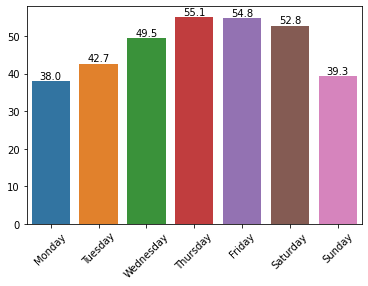

In [9]:
# view average job posting by day over dataframe period
ax = sns.barplot(x = occ.index , y = occ.values)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/day_bar.png")

In [10]:
# plot company by bar chart
top_comp = df["company_name"].value_counts().sort_values(ascending=False).head(20)
top_comp

walmart                                    490
cox communications                         239
edward jones                               236
centene corporation                         85
unitedhealth group                          65
mtc holding corporation                     58
elevance health                             57
apex systems                                48
humana                                      46
state of missouri                           45
cynet systems                               41
resume library                              40
tulsa remote                                38
robert half                                 36
fidelity investments                        34
the judge group                             32
peraton                                     32
o'reilly auto parts                         27
oracle                                      26
general dynamics information technology     25
Name: company_name, dtype: int64

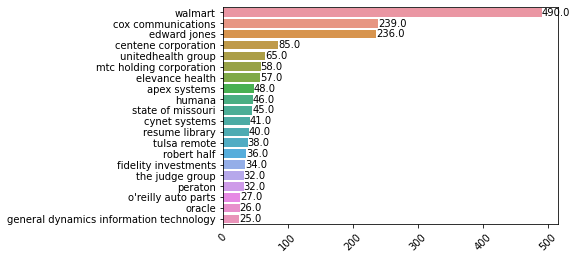

In [11]:
ax = sns.barplot(x = top_comp.values, y = top_comp.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/company_bar.png")

In [12]:
top_companies = top_comp.index

comp_break = df.groupby(["company_name", "level"])["title"].count()
select_comp = comp_break.iloc[comp_break.index.get_level_values('company_name').isin(top_companies)]

select_comp = select_comp.unstack().fillna(0).sort_values(by="mid-senior level")
select_comp

level,associate level,entry level,executive,mid-senior level,not applicable
company_name,,,,,
tulsa remote,0.0,0.0,0.0,0.0,38.0
cynet systems,0.0,0.0,0.0,0.0,41.0
o'reilly auto parts,0.0,0.0,9.0,0.0,18.0
the judge group,0.0,1.0,0.0,3.0,28.0
state of missouri,11.0,0.0,2.0,5.0,27.0
resume library,0.0,3.0,0.0,7.0,30.0
apex systems,2.0,0.0,1.0,8.0,37.0
elevance health,0.0,0.0,1.0,8.0,48.0
general dynamics information technology,2.0,1.0,0.0,8.0,14.0


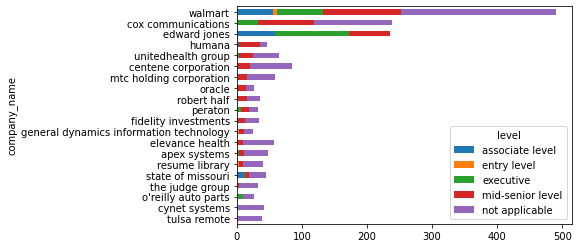

In [13]:
select_comp.plot(kind='barh', stacked=True )

plt.savefig("../resources/images/comp_break.png")

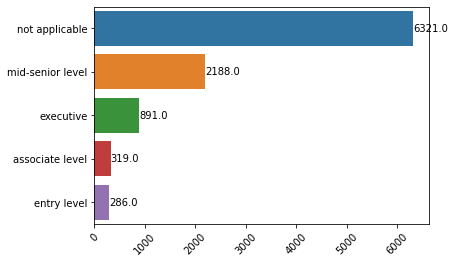

In [14]:
# plot seniority by bar chart

top_level = df["level"].value_counts().sort_values(ascending=False).head(20)

ax = sns.barplot(x = top_level.values, y = top_level.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/seniority.png")

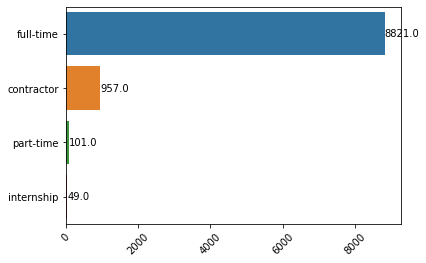

In [15]:
# plot schedule by bar chart

schd = df["etype"].value_counts().sort_values(ascending=False)

ax = sns.barplot(x = schd.values, y = schd.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/sched.png")

In [16]:
# binarize before moving forward

skills = pd.get_dummies(df.tech_tokens.apply(eval).explode()).sum(level=0)

skills

C:\Users\saidmf\AppData\Local\Temp\ipykernel_13428\3710965495.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  skills = pd.get_dummies(df.tech_tokens.apply(eval).explode()).sum(level=0)


,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,...,twilio,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,word
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


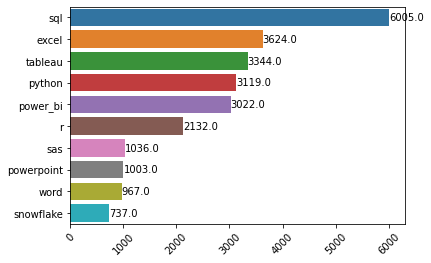

In [17]:
# visualize all listed skills

listed_skills = skills.sum().sort_values(ascending=False).head(10)

ax = sns.barplot(x = listed_skills.values, y = listed_skills.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/skills.png")

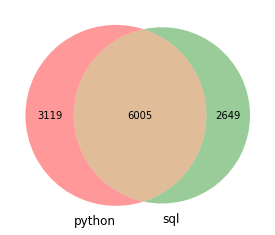

In [18]:
# compare language/software (using languages in the loosest of terms)

pysql = len(skills[(skills["python"] == 1) & (skills["sql"] == 1)])
python = len(skills[skills["python"] == 1])
sql = len(skills[skills["sql"] == 1])

counts = (python, pysql, sql)
venn2(subsets=counts, set_labels = ("python", "sql"))
plt.savefig("../resources/images/vennPythonSQL.png")

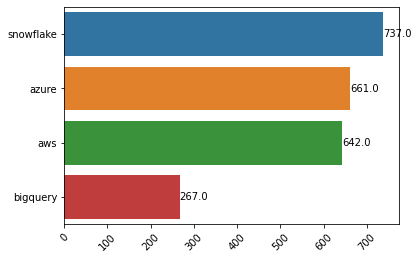

In [20]:
# compare cloud compute

cloud = ["azure", "aws", "bigquery", "snowflake"]

cloud_cert = skills[cloud].sum().sort_values(ascending=False)

ax = sns.barplot(x = cloud_cert.values, y = cloud_cert.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=45)
plt.savefig("../resources/images/cloud.png")

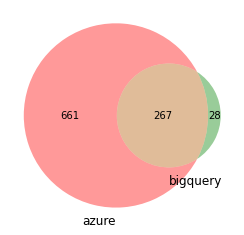

In [21]:
# ven diagrams

intersect = len(skills[(skills["azure"] == 1) & (skills["bigquery"] == 1)])
azure = len(skills[skills["azure"] == 1])
bg = len(skills[skills["bigquery"] == 1])

counts = (azure, intersect, bg)
venn2(subsets=counts, set_labels = ("azure", "bigquery"))
plt.savefig("../resources/images/vennAzureBG.png")

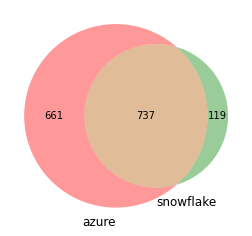

In [22]:
intersect = len(skills[(skills["azure"] == 1) & (skills["snowflake"] == 1)])
azure = len(skills[skills["azure"] == 1])
snowflake = len(skills[skills["snowflake"] == 1])

counts = (azure, intersect, snowflake)
venn2(subsets=counts, set_labels = ("azure", "snowflake"))
plt.savefig("../resources/images/vennAzureSnow.png")

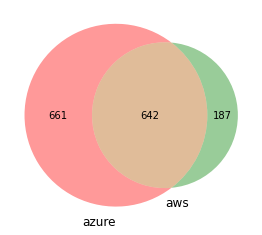

In [23]:
intersect2 = len(skills[(skills["azure"] == 1) & (skills["aws"] == 1)])
azure = len(skills[skills["azure"] == 1])
aws = len(skills[skills["aws"] == 1])

counts2 = (azure, intersect2, aws)
venn2(subsets=counts2, set_labels = ("azure", "aws"))
plt.savefig("../resources/images/vennAzureAWS.png")

In [24]:
# join back in to get date
df_skills = df.join(skills)

df_skills.head()

,title,company_name,location,date_time,work_from_home,tech_tokens,deg_tokens,level,etype,airflow,...,twilio,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,word
194,data analyst,robert half,"oklahoma city, ok",2023-05-21 07:00:30.990626,False,['go'],[],not applicable,contractor,0,...,0,0,0,0,0,0,0,0,0,0
195,marketing data analyst,ledger bennett,anywhere,2023-05-21 07:00:30.990626,True,"['excel', 'tableau', 'sql']",[],mid-senior level,full-time,0,...,0,0,0,0,0,0,0,0,0,0
196,"boolean search data analyst | $54,000-$108,000...",it pros,anywhere,2023-05-21 07:00:30.990626,True,[],[],not applicable,part-time,0,...,0,0,0,0,0,0,0,0,0,0
197,product data analyst - ditch witch - now hiring,the toro company,"perry, ok",2023-05-21 07:00:30.990626,False,"['assembly', 'excel', 'sap']",[],mid-senior level,full-time,0,...,0,0,0,0,0,0,0,0,0,0
198,data analyst,webtpa,united states,2023-05-21 07:00:30.990626,False,"['vba', 'ssrs', 'crystal', 'power_bi', 'ssis',...",[],not applicable,full-time,0,...,0,0,0,0,0,1,0,0,0,0


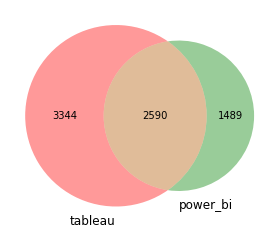

In [25]:
intersect = len(skills[(skills["tableau"] == 1) & (skills["power_bi"] == 1)])
tableau = len(skills[skills["tableau"] == 1])
power_bi = len(skills[skills["power_bi"] == 1])

counts2 = (tableau, intersect, power_bi)
venn2(subsets=counts2, set_labels = ("tableau", "power_bi"))
plt.savefig("../resources/images/vennTabPower.png")

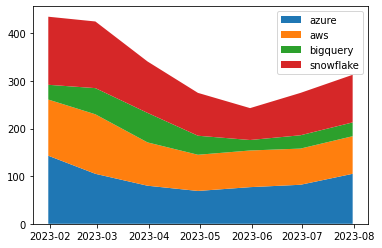

In [26]:
# stacked area chart for cloud cert

df_skills.index = df_skills["date_time"]

cloud_counts = df_skills.resample('1M').sum()[cloud]

plt.stackplot(cloud_counts.index, cloud_counts.azure.values, cloud_counts.aws.values, cloud_counts.bigquery.values, cloud_counts.snowflake.values, labels=cloud)
plt.legend(loc='upper right')
plt.savefig("../resources/images/stackedCloud.png")

In [27]:
lev_counts = df_skills.resample('1M')["level"].value_counts().unstack()
lev_counts

level,associate level,entry level,executive,mid-senior level,not applicable
date_time,,,,,
2023-01-31,47,52,218,437,1197
2023-02-28,40,26,162,339,871
2023-03-31,79,46,92,317,904
2023-04-30,39,54,105,255,845
2023-05-31,23,41,88,270,820
2023-06-30,47,36,115,269,844
2023-07-31,44,31,111,301,840


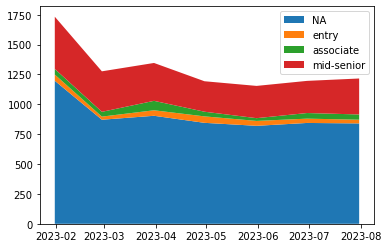

In [28]:
levels = ["NA", "entry", "associate", "mid-senior"]

# stacked area chart for level employment

plt.stackplot(lev_counts.index, lev_counts["not applicable"].values, lev_counts["entry level"].values, lev_counts["associate level"].values, lev_counts["mid-senior level"].values, labels=levels)
plt.legend(loc='upper right')
plt.savefig("../resources/images/stackedLevel.png")

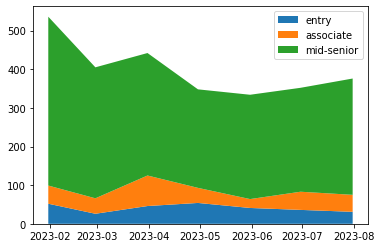

In [29]:
levels_red = ["entry", "associate", "mid-senior"]

# stacked area chart for level employment

plt.stackplot(lev_counts.index, lev_counts["entry level"].values, lev_counts["associate level"].values, lev_counts["mid-senior level"].values, labels=levels_red)
plt.legend(loc='upper right')
plt.savefig("../resources/images/stackedLevelDiminished.png")

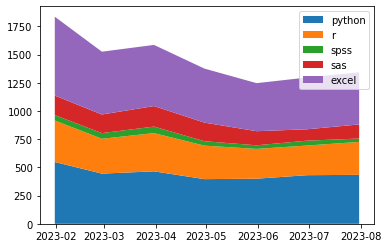

In [42]:
# get stacked area chart for stat language skills

statlang = ["python", "r", "spss", "sas", "excel"]

stat_counts = df_skills.resample('1M').sum()[statlang]

# stacked area chart for level employment

plt.stackplot(
    stat_counts.index, 
    stat_counts["python"].values,  
    stat_counts["r"].values, 
    stat_counts["spss"].values, 
    stat_counts["sas"].values, 
    stat_counts["excel"].values, labels=statlang)

plt.legend(loc='upper right')
plt.savefig("../resources/images/stackedTools.png")

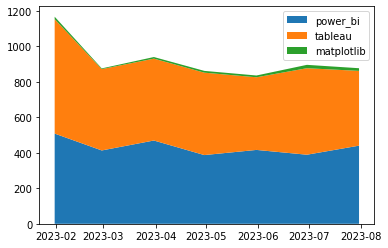

In [43]:
vizzes = ["power_bi", "tableau", "matplotlib"]

viz_counts = df_skills.resample('1M').sum()[vizzes]

# stacked area chart for visualization tools

plt.stackplot(
    viz_counts.index, 
    viz_counts["power_bi"].values,  
    viz_counts["tableau"].values, 
    viz_counts["matplotlib"].values, 
    labels=vizzes)

plt.legend(loc='upper right')
plt.savefig("../resources/images/stackedViz.png")

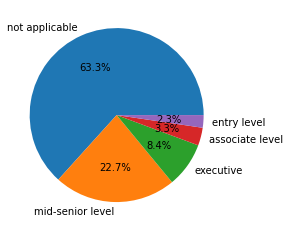

In [44]:
# get percentages for last known month of jobs

# level employment
df_reduced = df_skills[df_skills["date_time"] > '2023-07-01']

level_perc = df_reduced["level"].value_counts()

plt.pie(level_perc.values, labels = level_perc.index, autopct='%.1f%%')
plt.savefig("../resources/images/pieLevel.png")

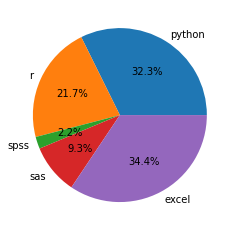

In [45]:
# stat language skills required
stat_skills = df_reduced[statlang].sum()

plt.pie(stat_skills.values, labels = stat_skills.index, autopct='%.1f%%')
plt.savefig("../resources/images/pieStats.png")

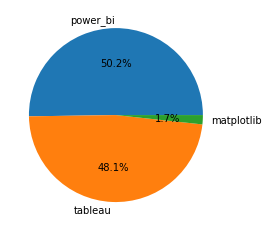

In [46]:
# visualization skills required
vis_skills = df_reduced[["power_bi", "tableau", "matplotlib"]].sum()

plt.pie(vis_skills.values, labels = vis_skills.index, autopct='%.1f%%')
plt.savefig("../resources/images/pieViz.png")

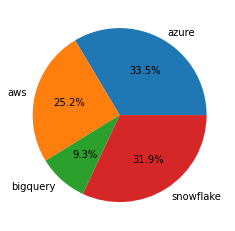

In [47]:
# cloud skills
cloud_cert = df_reduced[["azure", "aws", "bigquery", "snowflake"]].sum()

plt.pie(cloud_cert.values, labels = cloud_cert.index, autopct='%.1f%%')
plt.savefig("../resources/images/pieCloud.png")